In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris=load_iris()
x=iris['data']
y=iris['target']

names=iris['target_names']
feature_names=iris['feature_names']

# Scale data to have mean 0 and variance 1 
# which is important for convergence of the neural network

scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# Split the data set into training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled,y,test_size=0.2,random_state=2)

In [2]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(x,columns=feature_names)
df['Species']=y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


C:\Users\Sreedhar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


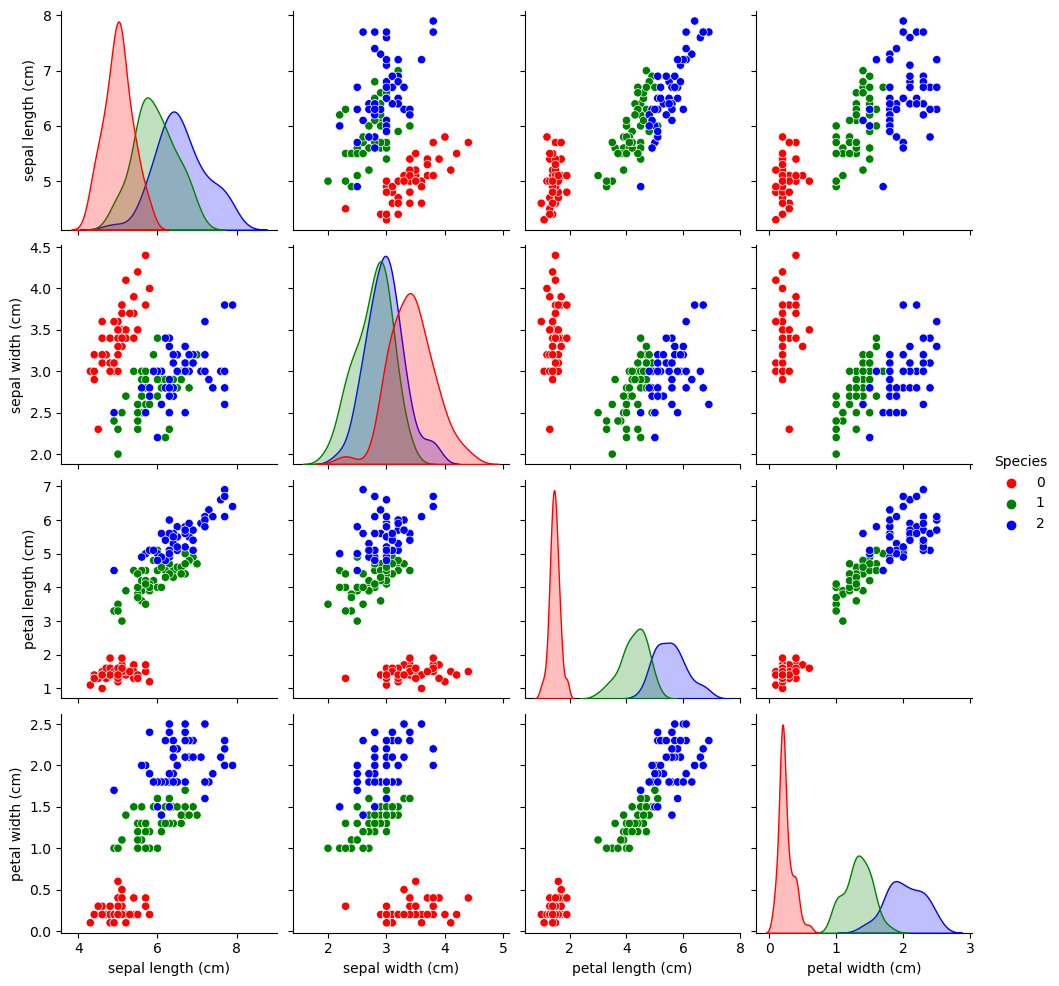

In [9]:
import seaborn as sns
sns.pairplot(data=df,hue='Species',palette=['red','green','blue'])
plt.show()

In [14]:
import torch
import torch.nn.functional as F   # use to get activation function
import torch.nn as nn    # use to design neural network
from torch.autograd import Variable   # use to convert numpy array to pytorch tensor

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)   # Hidden layer1 with 50 neurons 
        self.layer2 = nn.Linear(50, 50)     #  Hidden layer2 with 50 neurons 
        self.layer3 = nn.Linear(50, 3)      # Output layer1 with 3 neurons


    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

model = Model(xtrain.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
    
    

In [15]:
print(xtrain.shape[1])

4


In [16]:
model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [17]:
xtrain

array([[ 4.32165405e-01, -5.92373012e-01,  5.92245988e-01,
         7.90670654e-01],
       [-9.00681170e-01,  5.58610819e-01, -1.16971425e+00,
        -9.20547742e-01],
       [-2.94841818e-01, -3.62176246e-01, -8.98031345e-02,
         1.32509732e-01],
       [ 2.24968346e+00,  1.70959465e+00,  1.67215710e+00,
         1.31719939e+00],
       [-5.37177559e-01, -1.31979479e-01,  4.21733708e-01,
         3.95774101e-01],
       [-5.25060772e-02,  2.16998818e+00, -1.45390138e+00,
        -1.31544430e+00],
       [ 6.74501145e-01, -5.92373012e-01,  1.04694540e+00,
         1.31719939e+00],
       [ 3.10997534e-01, -1.31979479e-01,  4.78571135e-01,
         2.64141916e-01],
       [-4.16009689e-01, -1.74335684e+00,  1.37546573e-01,
         1.32509732e-01],
       [ 1.28034050e+00,  9.82172869e-02,  7.62758269e-01,
         1.44883158e+00],
       [ 1.89829664e-01, -3.62176246e-01,  4.21733708e-01,
         3.95774101e-01],
       [ 4.32165405e-01, -3.62176246e-01,  3.08058854e-01,
      

In [18]:
import tqdm

EPOCHS = 100

xtrain = Variable(torch.from_numpy(xtrain)).float()
ytrain = Variable(torch.from_numpy(ytrain)).long()
xtest = Variable(torch.from_numpy(xtest)).float()
ytest = Variable(torch.from_numpy(ytest)).long()

loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(xtrain)
    loss = loss_fn(y_pred, ytrain)
    loss_list[epoch]=loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(xtest)
        correct = (torch.argmax(y_pred, dim=1) == ytest).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()
    

100%|██████████| 100/100 [00:00<00:00, 250.47it/s]


In [19]:
print('Accuracy is', accuracy_list[99])

Accuracy is 0.9333333373069763


In [20]:
print('Loss is', loss_list[99])

Loss is 0.6758093237876892


In [21]:
from sklearn.metrics import classification_report

In [22]:
train_pred = model(xtrain)
print(train_pred)

tensor([[7.2633e-03, 3.0266e-01, 6.9008e-01],
        [9.7314e-01, 2.2996e-02, 3.8610e-03],
        [6.7962e-02, 8.2916e-01, 1.0287e-01],
        [6.5209e-04, 1.5813e-02, 9.8353e-01],
        [4.3335e-02, 7.3228e-01, 2.2438e-01],
        [9.9791e-01, 1.6491e-03, 4.4237e-04],
        [9.8690e-04, 8.0459e-02, 9.1855e-01],
        [3.3577e-02, 5.8456e-01, 3.8186e-01],
        [5.2838e-03, 9.4245e-01, 5.2263e-02],
        [1.5261e-03, 5.7093e-02, 9.4138e-01],
        [2.5689e-02, 5.6901e-01, 4.0530e-01],
        [3.4356e-02, 7.1985e-01, 2.4579e-01],
        [7.8341e-04, 3.3550e-02, 9.6567e-01],
        [1.0186e-02, 9.7513e-01, 1.4681e-02],
        [9.9218e-01, 6.6659e-03, 1.1515e-03],
        [3.7825e-03, 5.2007e-01, 4.7615e-01],
        [9.9069e-01, 7.9306e-03, 1.3762e-03],
        [3.3143e-02, 5.9057e-01, 3.7629e-01],
        [9.9394e-01, 5.0244e-03, 1.0380e-03],
        [9.9277e-01, 5.9927e-03, 1.2403e-03],
        [9.9165e-01, 7.0397e-03, 1.3129e-03],
        [6.3885e-03, 8.7382e-01, 1

In [23]:
train_pred = model(xtrain).argmax(dim=1)

In [24]:
train_pred

tensor([2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2,
        0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2,
        0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2,
        2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1,
        2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0])

In [25]:
print(classification_report(ytrain,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.93      0.88      0.90        42
           2       0.89      0.93      0.91        42

    accuracy                           0.93       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.93      0.93      0.93       120



In [26]:
test_pred = model(xtest).argmax(dim=1)

In [27]:
test_pred

tensor([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
        1, 0, 0, 2, 0, 2])

In [28]:
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.75      0.86         8
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.92      0.92        30
weighted avg       0.95      0.93      0.93        30

